# Loading FLEKS Data Into VDFpy

In [3]:
from flekspy.util import download_testfile

url = "https://raw.githubusercontent.com/henry2004y/batsrus_data/master/3d_particle.tar.gz"
download_testfile(url, "data")

In [56]:
import vdfpy.fleks
import flekspy
import logging
import yt

# Set the logging level for yt to WARNING to suppress outputs
yt.funcs.mylog.setLevel(logging.WARNING)

file = "data/3d_*amrex"
ds = flekspy.load(file)

left_edge = ds.domain_left_edge
right_edge = [*ds.domain_center[0:2], ds.domain_right_edge[2]]
df1 = vdfpy.fleks.load(file, left_edge, right_edge)
left_edge = [*ds.domain_center[0:2], ds.domain_left_edge[2]]
right_edge = ds.domain_right_edge
df2 = vdfpy.fleks.load(file, left_edge, right_edge)

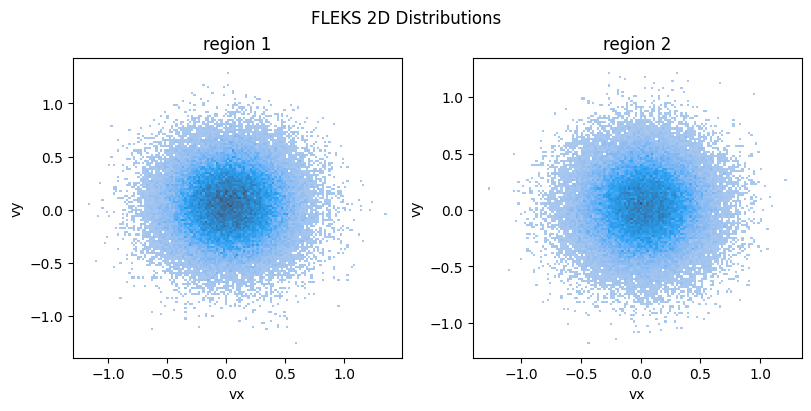

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(1, 2, figsize=(8, 4), layout="constrained")
fig.suptitle("FLEKS 2D Distributions")

hp = sns.histplot(df1["particle velocity"][0],
                  x="vx", y="vy",
                  stat="density",
                  ax=axs[0]
                 )
axs[0].set_title("region 1")
hp = sns.histplot(df2["particle velocity"][0],
                  x="vx", y="vy",
                  stat="density",
                  ax=axs[1]
                 )
axs[1].set_title("region 2")
plt.show()